# Import important Libraries

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import os

# Uploading dataset

In [95]:
def loading_dataset(file_path):
    file_extension = file_path.split('.')[-1]
    
    if file_extension == "csv":
        return pd.read_csv(file_path)
    elif file_extension == "xlsx":
        return pd.read_excel(file_path)
    elif file_path.endswith('.sql'):
        conn = pd.read_sql('your_sql_query', 'your_connection_string')
        return conn
    else:
        raise ValueError("Unsupported file format")
    print("Dataset loaded successfully.")

# Show infos about Our Dataset

In [96]:
def show_infos(df):
    print(df.describe())
    print("======================================================")
    print("======================================================")
    print("======================================================")
    print(df.describe(include=["bool","object"]))
    print("======================================================")
    print("======================================================")
    print("======================================================")
    print(df.info())
    print("======================================================")
    print("======================================================")
    print("======================================================")
    print("======================================================")
    print(df.isnull().sum())
    print("======================================================")
    print("======================================================")
    print("======================================================")

# Preprocessing Area

In [97]:
def data_preprocessing(df):
    # Handling missing values
    df.fillna(0, inplace=True)  # Replace missing values with 0
    
    # Separate categorical and numerical columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
    
    # Convert categorical columns to strings
    for col in categorical_cols:
        df[col] = df[col].astype(str)
    
    # Encoding categorical features
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    # Scaling numerical features
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    return df, label_encoders, scaler

# Data visualization zone

In [98]:
def data_visualization(df):
    numerical_cols = df.select_dtypes(include=["float64", "int64"]).columns
    categorical_cols = df.select_dtypes(include=["object"]).columns
    
    for col in numerical_cols:
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
        
        # Scatter Plot
        sns.scatterplot(data=df, x=col, y=df.columns[-1], ax=axes[0])
        axes[0].set_xlabel(col)
        axes[0].set_ylabel(df.columns[-1])
        axes[0].set_title(f'Scatter Plot: {col} vs {df.columns[-1]}')
        
        # Histogram
        sns.histplot(data=df, x=col, bins=10, ax=axes[1])
        axes[1].set_xlabel(col)
        axes[1].set_ylabel('Frequency')
        axes[1].set_title(f'Histogram of {col}')
        
        # Box Plot
        sns.boxplot(data=df, y=col, ax=axes[2])
        axes[2].set_ylabel(col)
        axes[2].set_title(f'Box Plot of {col}')
        
        # Tight layout for numerical plots
        plt.tight_layout()
        plt.show()
    
    for col in categorical_cols:
        if len(df[col].unique()) <= 10:
            fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
            
            # Pie Chart
            value_counts = df[col].value_counts()
            axes[0].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axes[0].axis('equal')
            axes[0].set_title(f'Pie Chart of {col}')
            
            # Bar Plot
            value_counts.plot(kind='bar', ax=axes[1])
            axes[1].set_xlabel(col)
            axes[1].set_ylabel('Frequency')
            axes[1].set_title(f'Bar Plot of {col}')
            
            # Tight layout for categorical plots
            plt.tight_layout()
            plt.show()


# MAIN

Drop your dataset path hereC:/Users/AliAy/OneDrive/Desktop/electro pi/2 - EDA course/International_Report_Departures.csv
                Year          Month     usg_apt_id        usg_wac  \
count  930808.000000  930808.000000  930808.000000  930808.000000   
mean     2006.021361       6.414783   12809.473781      42.511740   
std         8.558831       3.471070    2716.223845      27.571338   
min      1990.000000       1.000000   10010.000000       1.000000   
25%      1999.000000       3.000000   11618.000000      22.000000   
50%      2007.000000       6.000000   12892.000000      33.000000   
75%      2014.000000       9.000000   13487.000000      72.000000   
max      2020.000000      12.000000   99999.000000      93.000000   

           fg_apt_id         fg_wac      airlineid   carriergroup  \
count  930808.000000  930808.000000  930808.000000  930808.000000   
mean    13484.676238     466.910479   20057.217505       0.599361   
std      1932.601107     288.005971     479.071456

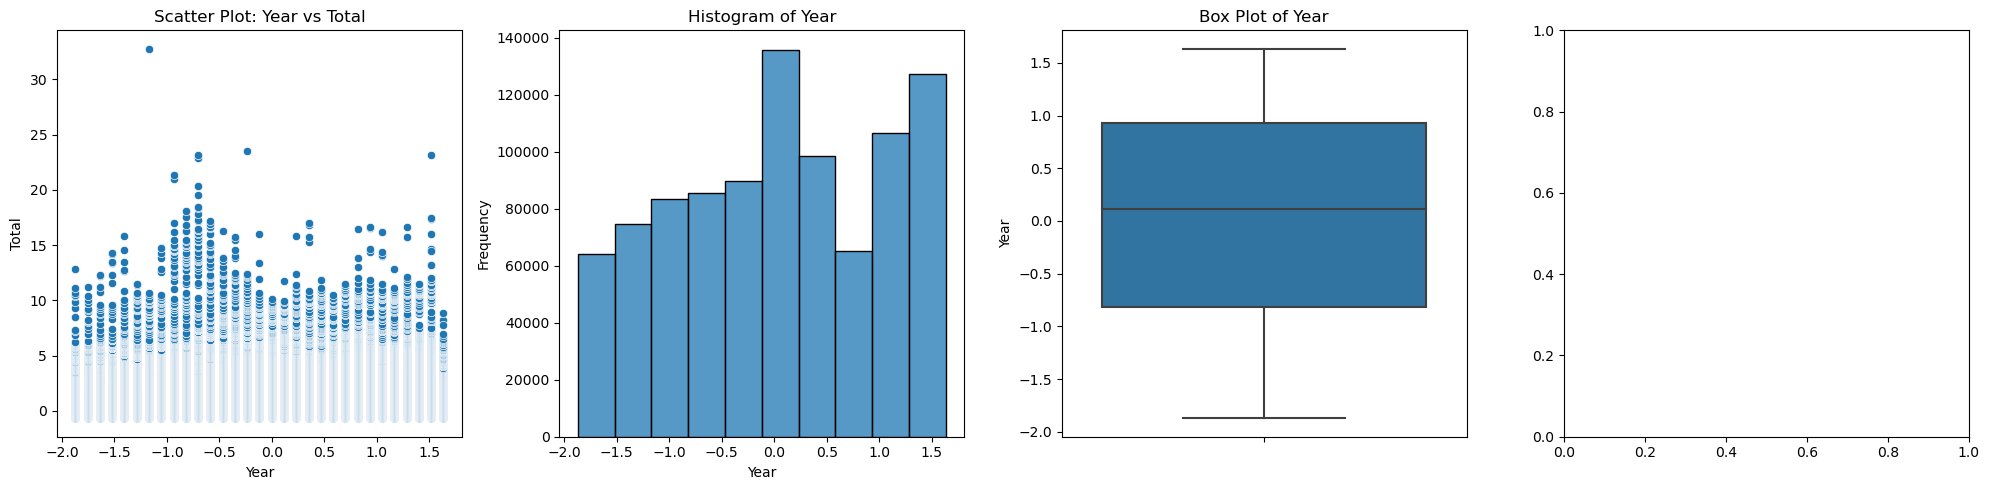

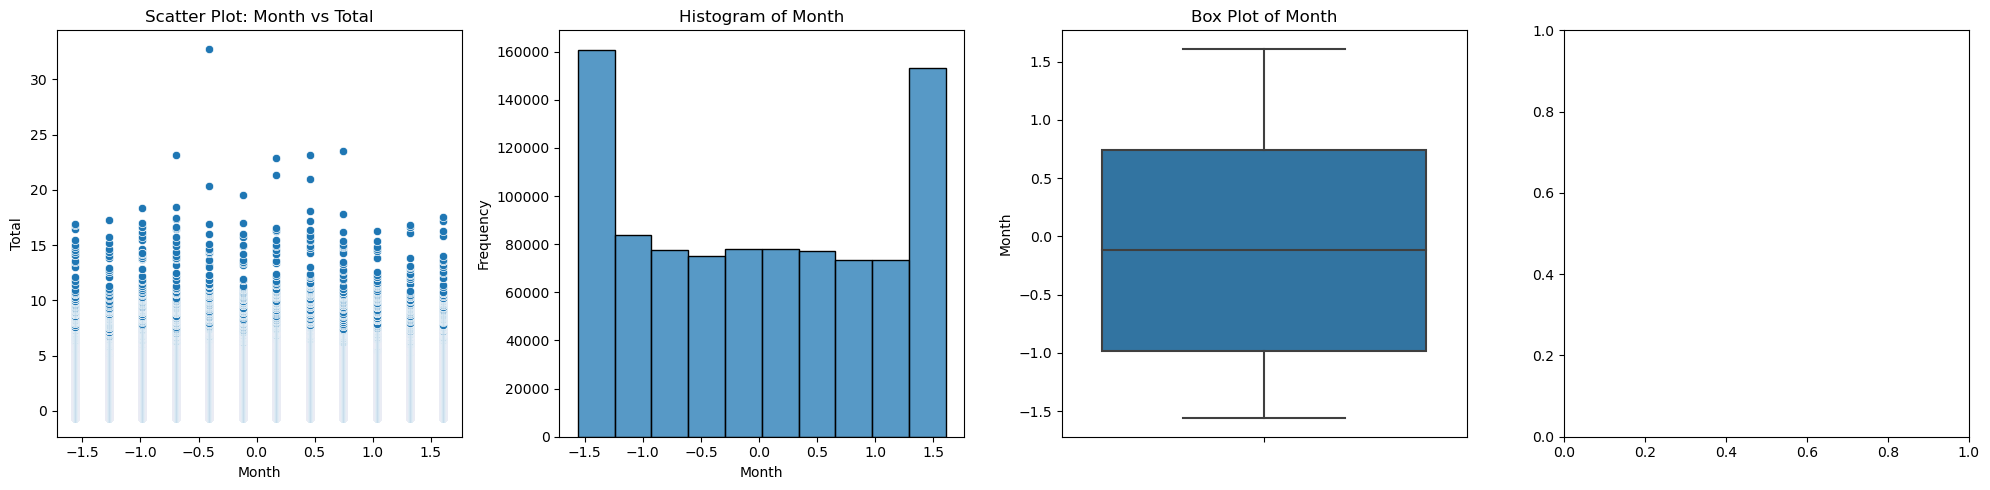

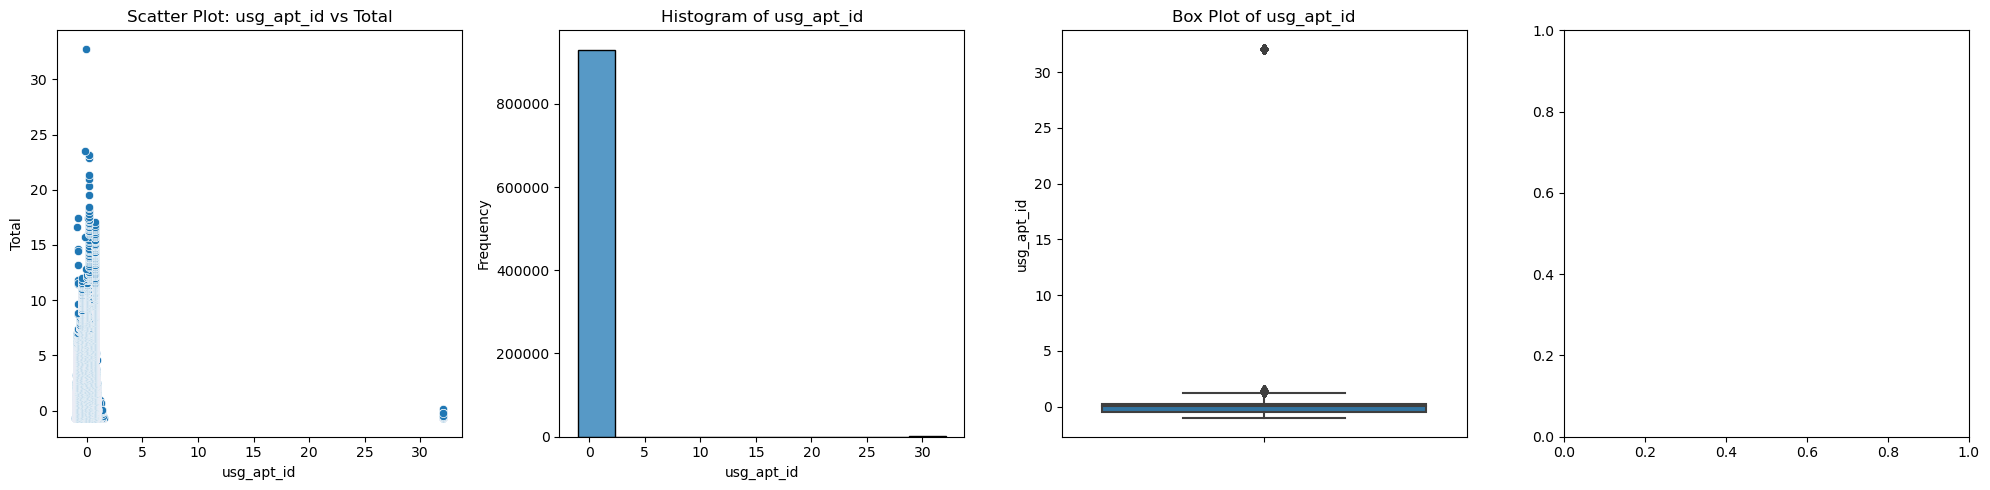

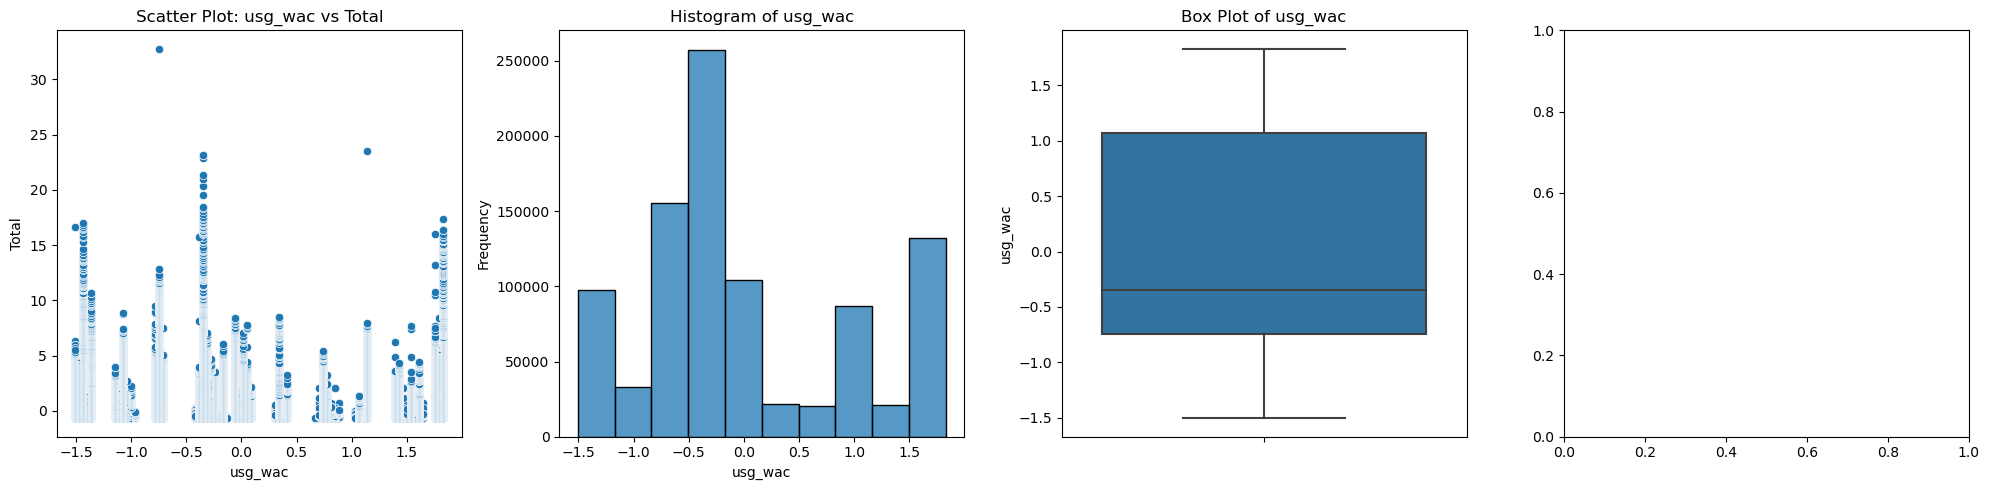

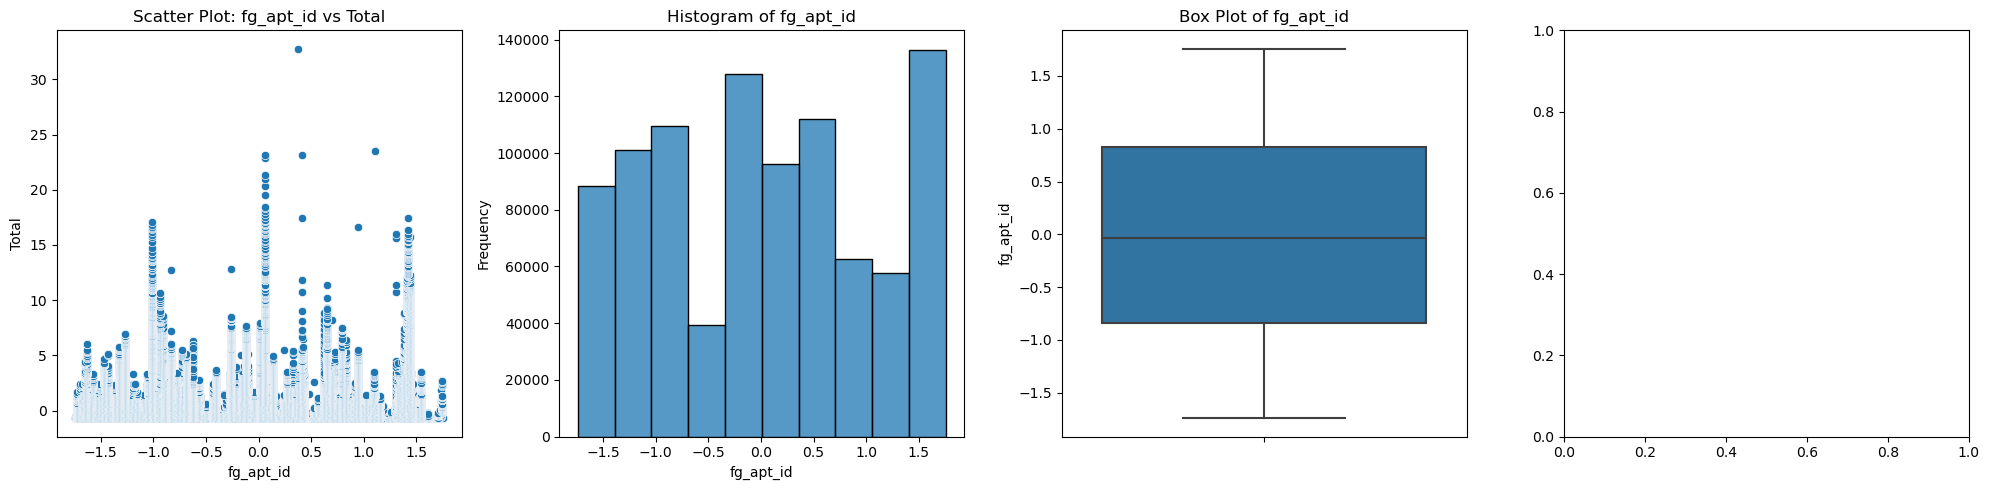

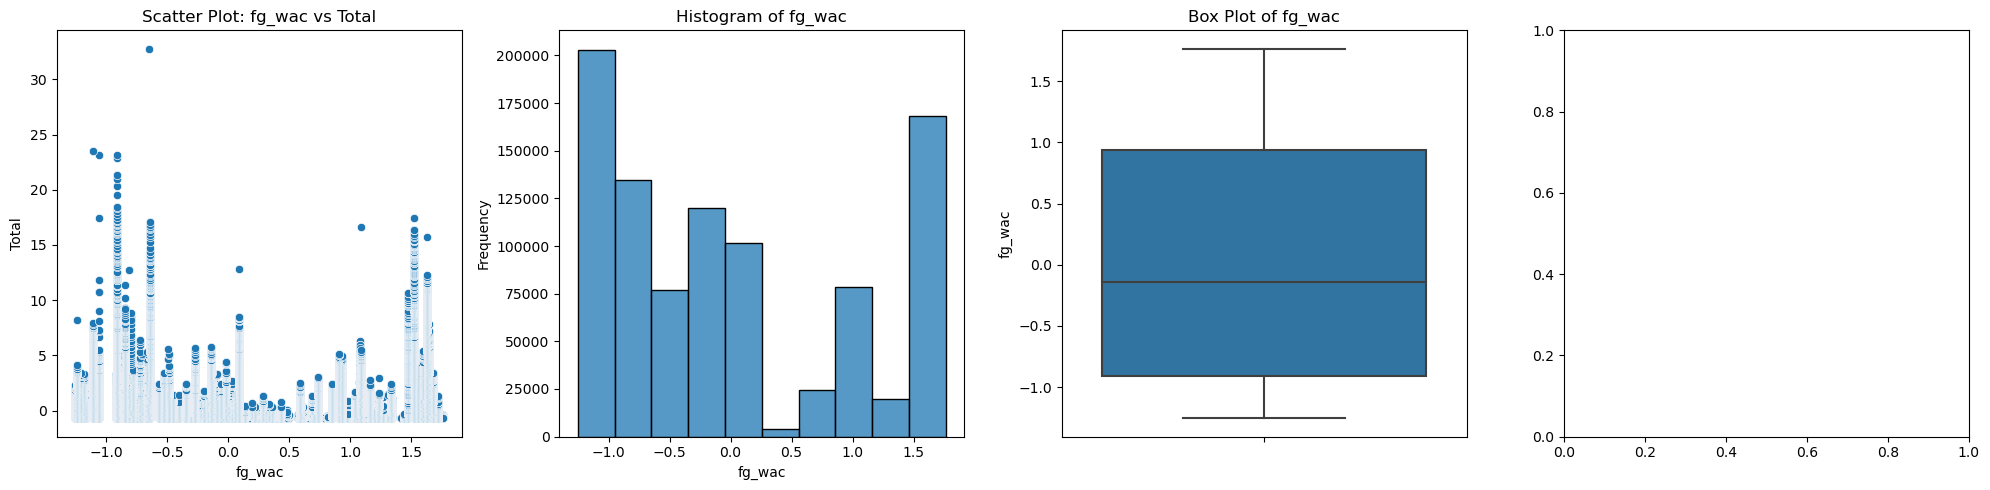

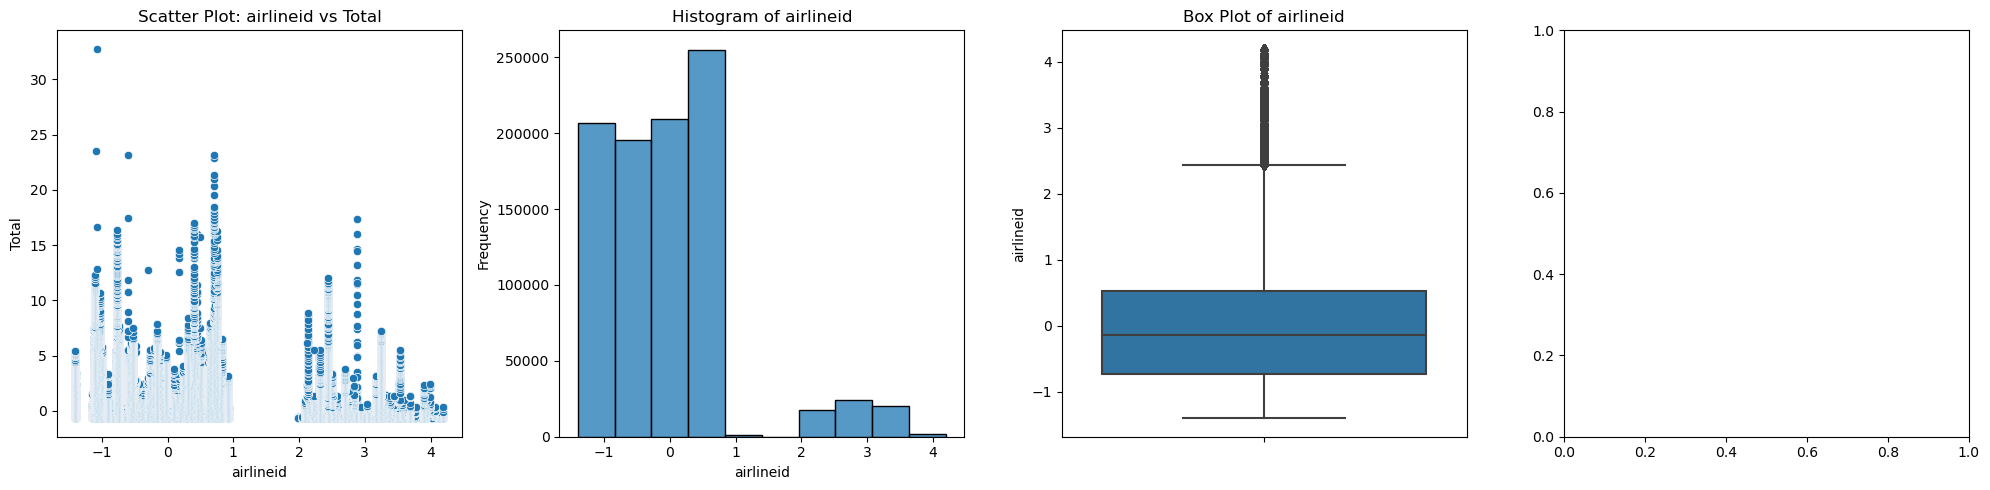

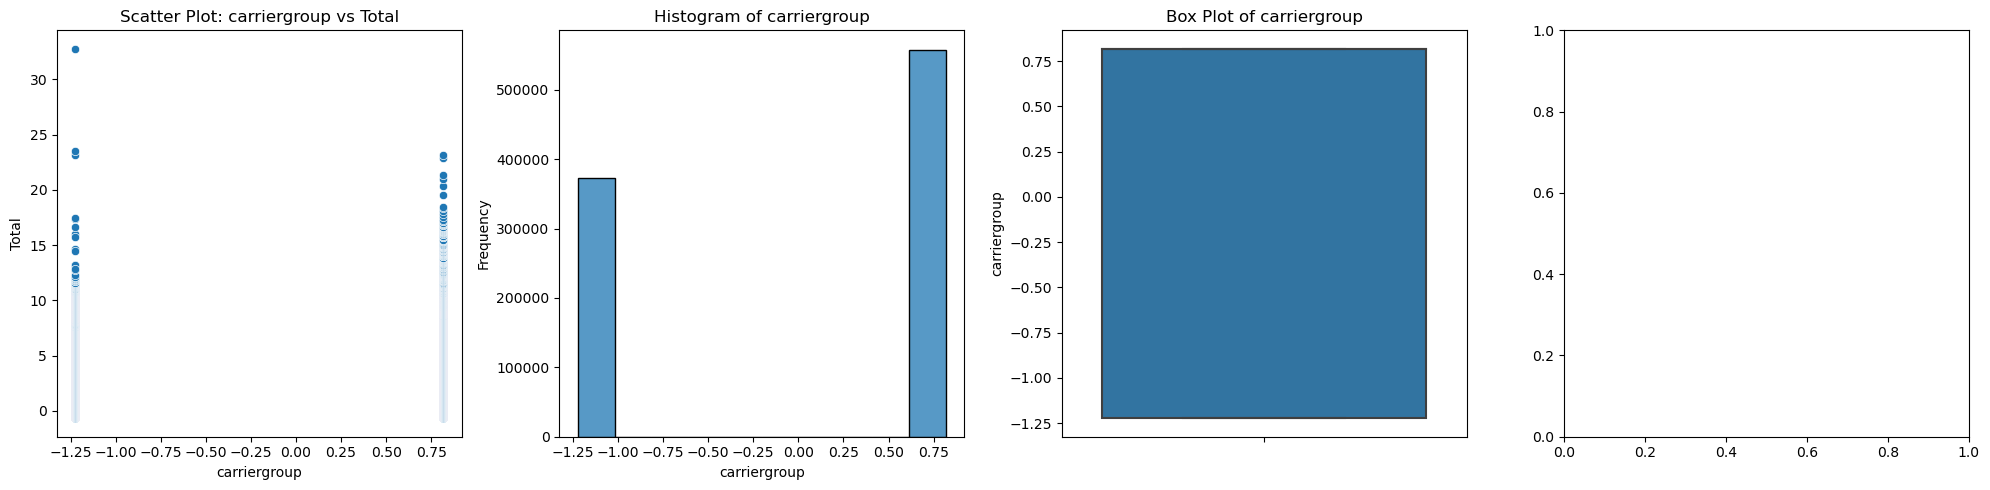

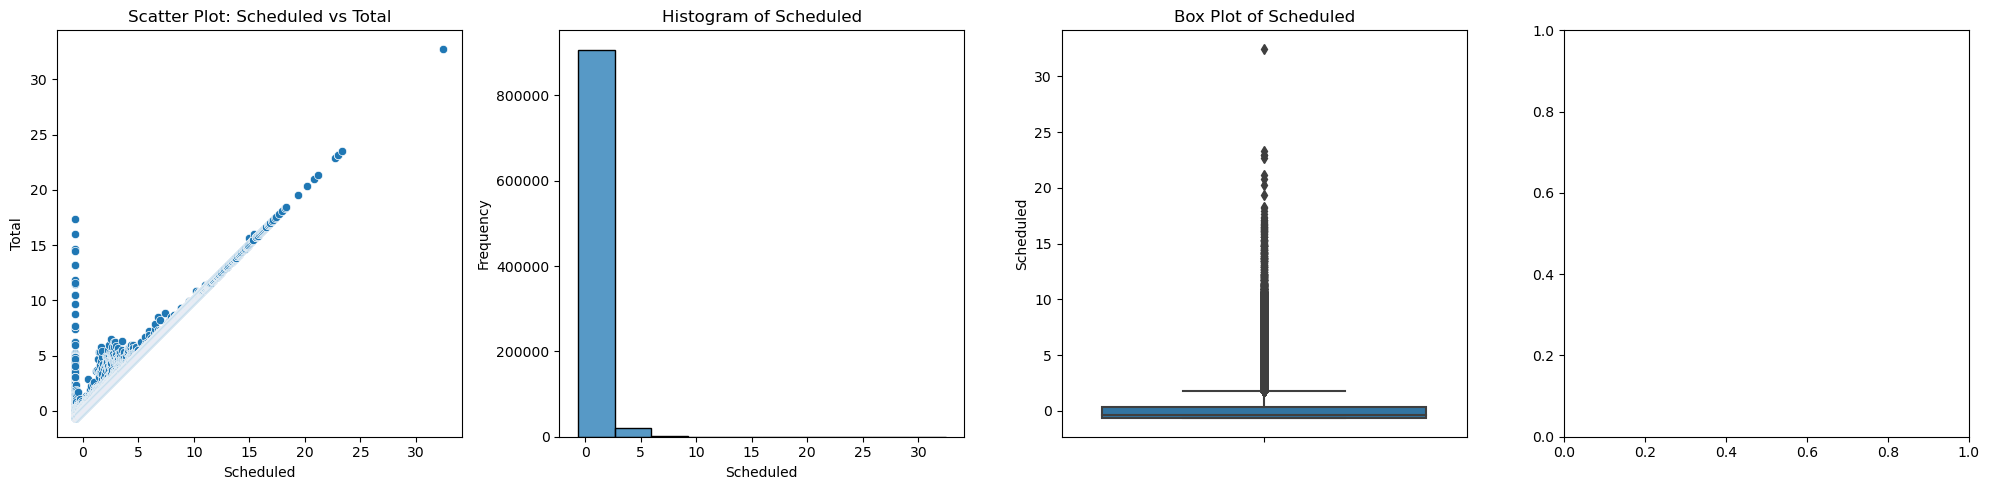

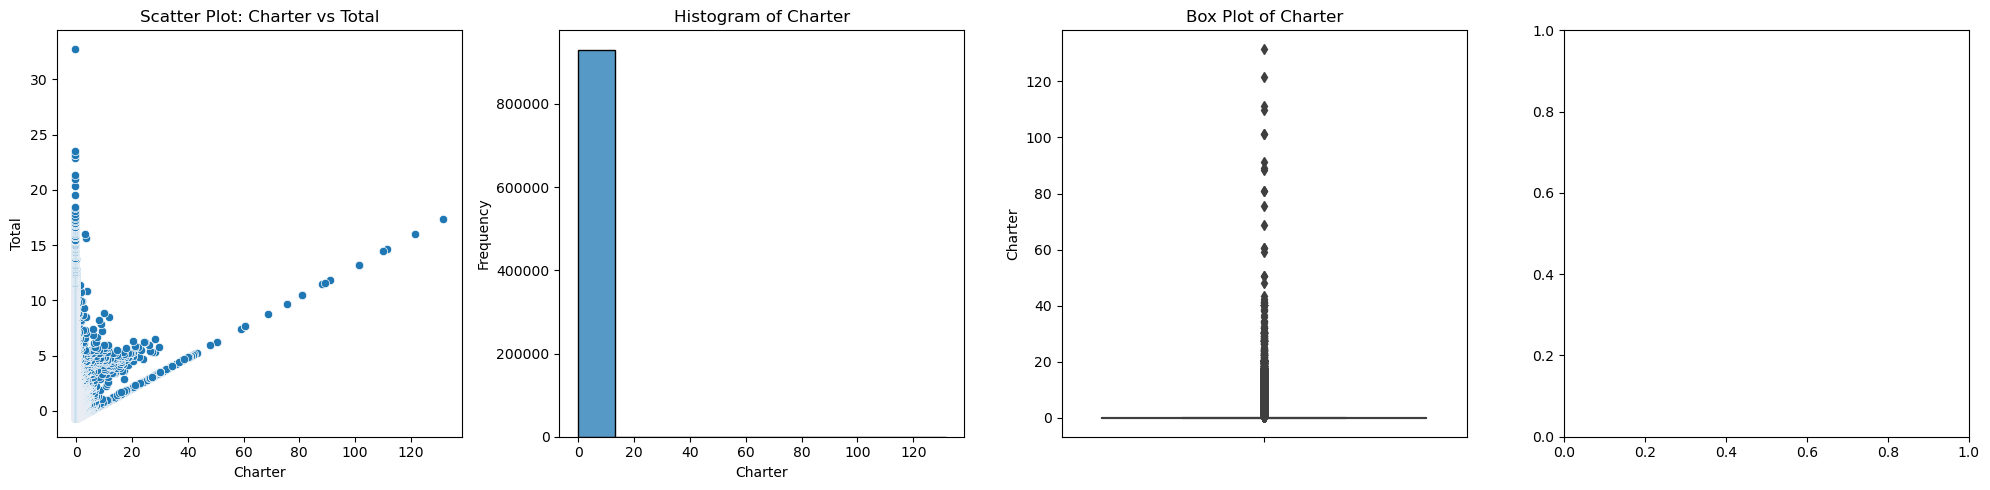

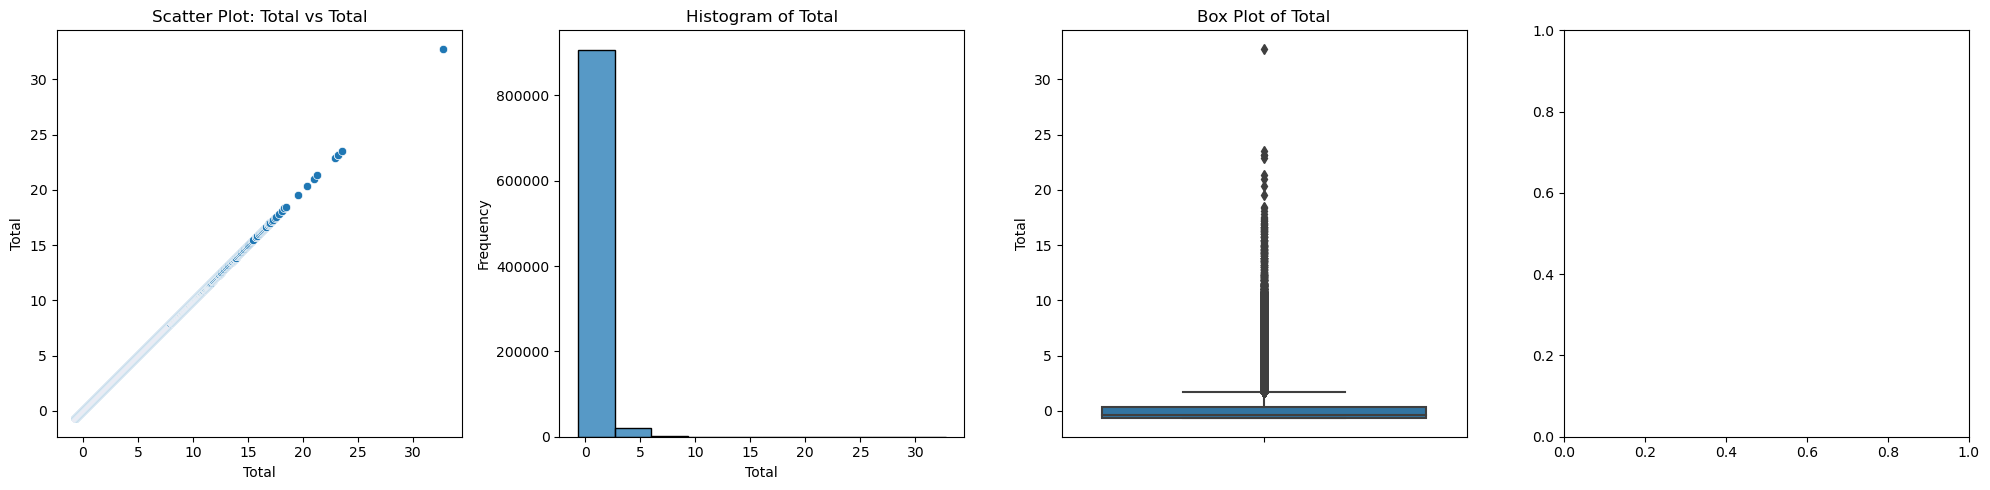

In [100]:
if __name__ == "__main__":
    
    file_path = input("Drop your dataset path here")
    
    df = loading_dataset(file_path)
    
    show_infos = show_infos(df)
    
    preprocessed_df, label_encoders, scaler = data_preprocessing(df)
    
    print(preprocessed_df)
    print("======================================================")
    print("======================================================")
    print("======================================================")
    data_visualization(preprocessed_df)

In [101]:

# dataset path

# C:/Users/AliAy/OneDrive/Desktop/electro pi/2 - EDA course/International_Report_Departures.csv